In [1]:
%matplotlib inline
import numpy as np 
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

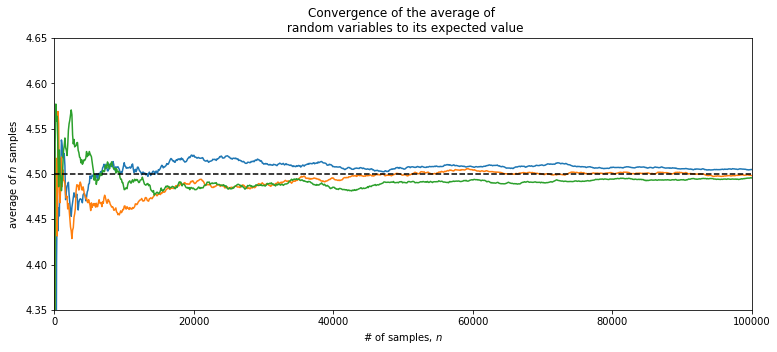

In [8]:
figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label='average \
            of $n$ samples; seq. %d' % k)
    
plt.plot(N_samples, expected_value*np.ones_like(partial_average),
        ls='--', label='true expected value', c='k')
         
plt.ylim(4.35, 4.65)
plt.xlim(0, 100000)
plt.title('Convergence of the average of \n random variables to its expected value')
plt.ylabel('average of $n$ samples')
plt.xlabel('# of samples, $n$')
plt.legend;

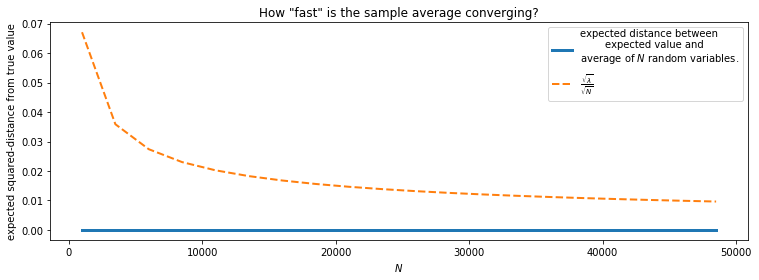

In [19]:
figsize(12.5, 4)

N_Y = 250
N_array = np.arange(1000, 50000, 2500)
D_N_results = np.zeros_like(N_array)

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    """This function approximates D_n, the average variance of using n samples.
    """
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)

plt.xlabel('$N$')
plt.ylabel('expected squared-distance from true value')
plt.plot(N_array, D_N_results, lw=3,
        label='expected distance between\n\
        expected value and \naverage of $N$ random variables.')
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array),
        lw=2, ls='--', label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title('How "fast" is the sample average converging?');